## 0. Get data
To run the code behind, the data location is in: 
* Modeling_Semantic_Plausibility/Data/pap, 
* Modeling_Semantic_Plausibility/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/pap_preds_filter1.txt (file of pap predictions results by the first llama2 train with pap)
* Modeling_Semantic_Plausibility/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/pap_preds_filter.txt (file of pap predictions results by the second llama2 train with pap)
* Modeling_Semantic_Plausibility/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/pap_preds.txt (file of pap predictions results by llama2 train with pap+pep3k)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from data_wrong_analysis import DataAnalysis_wrong, Abstractness_wrong
print(os.path.abspath(''))

/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis


In [2]:
with open('pap_preds_filter1.txt', 'r') as f:
    pap_preds = eval(f.read())

pap_list_wrong = []

for i in pap_preds:
    if pap_preds[i]['preds'] != pap_preds[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong.append(pap_temp)
for i in pap_list_wrong:
    print(i)
    print(i[1]) 
    break


['0', 'dollar receives sheet']
dollar receives sheet


In [3]:
with open('pap_preds_filter.txt', 'r') as f:
    pap_preds2 = eval(f.read())

pap_list_wrong2 = []

for i in pap_preds2:
    if pap_preds2[i]['preds'] != pap_preds2[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds2[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong2.append(pap_temp)
print(pap_list_wrong2)
for i in pap_list_wrong2:
    print(i[1]) 
    break

[['1', 'growth implies ground'], ['0', 'couple finds cockroach'], ['1', 'memory improves fitness'], ['1', 'casualty comprises man'], ['1', 'dolphin poses snout'], ['1', 'elephant bounces tip'], ['1', 'philosopher compares convenience'], ['1', 'bank cuts link'], ['1', 'improvement improves toolbox'], ['1', 'princess awakens desire'], ['1', 'army rediscovers shotgun'], ['1', 'fortitude bolsters reputation'], ['1', 'ratio outnumbers name'], ['1', 'kangaroo assists roommate'], ['1', 'newspaper stimulates tradition'], ['1', 'descriptor finds forest'], ['1', 'host passes ticket'], ['1', 'lawn inhibits cockroach'], ['1', 'attendee disengages norm'], ['1', 'guest watches detonation'], ['1', 'property characterizes bearer'], ['1', 'development initiates building'], ['1', 'man retrieves identification']]
growth implies ground


In [4]:
with open('pap_preds.txt', 'r') as f:
    pap_preds3 = eval(f.read())

pap_list_wrong3 = []

for i in pap_preds3:
    if pap_preds3[i]['preds'] != pap_preds3[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds3[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong3.append(pap_temp)
print(pap_list_wrong3)
for i in pap_list_wrong3:
    print(i[1]) 
    break

[['1', 'growth implies ground'], ['1', 'descriptor finds forest'], ['1', 'guest watches detonation'], ['1', 'memory improves fitness'], ['0', 'household finds tadpole'], ['0', 'pun develops mystery'], ['1', 'philosopher compares convenience'], ['1', 'elephant bounces tip'], ['0', 'method considers manifestation'], ['1', 'attendee disengages norm'], ['0', 'airship provides compliance'], ['0', 'apple encrypts service'], ['0', 'child realizes bee'], ['0', 'ceremony distributes book'], ['0', 'journalist pinpoints attainment'], ['1', 'choice treats water'], ['0', 'preoccupation emphasizes construction'], ['0', 'escalation guarantees famine'], ['0', 'gardening mentions bean'], ['1', 'ratio outnumbers name'], ['1', 'army rediscovers shotgun'], ['0', 'couple finds cockroach'], ['1', 'fortitude bolsters reputation'], ['1', 'newspaper stimulates tradition']]
growth implies ground


## 1. basic analysis

* pap for wrong prediction samples from the first pap fine-tuned llama2
* pap2 for wrong prediction samples from the second pap fine-tuned llama2 
* pap3 for wrong prediction samples from pap+pep3k fine-tuned llama2 

In [5]:
data_set_pap=DataAnalysis_wrong(pap_list_wrong)
data_set_pap2=DataAnalysis_wrong(pap_list_wrong2)
data_set_pap3=DataAnalysis_wrong(pap_list_wrong3)

In [6]:
print('pap:number of rows and columns, number of classes')
print('pap:',data_set_pap.dataset_statistics,data_set_pap.classes_num) 
print('pap2:',data_set_pap2.dataset_statistics, data_set_pap2.classes_num)
print('pap3:',data_set_pap3.dataset_statistics, data_set_pap3.classes_num)

pap:number of rows and columns, number of classes
pap: [26, 2] {'0': 5, '1': 21}
pap2: [23, 2] {'0': 1, '1': 22}
pap3: [24, 2] {'0': 12, '1': 12}


# 2. tokens analysis (word counts)

## 2.1 tokens number

In [7]:
print('pap:total_tokens, num_unique_tokens')
print('pap:',len(data_set_pap.all_tokens),data_set_pap.num_unique_tokens)
print('pap2:',len(data_set_pap2.all_tokens),data_set_pap2.num_unique_tokens)
print('pap3:',len(data_set_pap2.all_tokens),data_set_pap2.num_unique_tokens)

pap:total_tokens, num_unique_tokens
pap: 78 73
pap2: 69 65
pap3: 69 65


pap:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


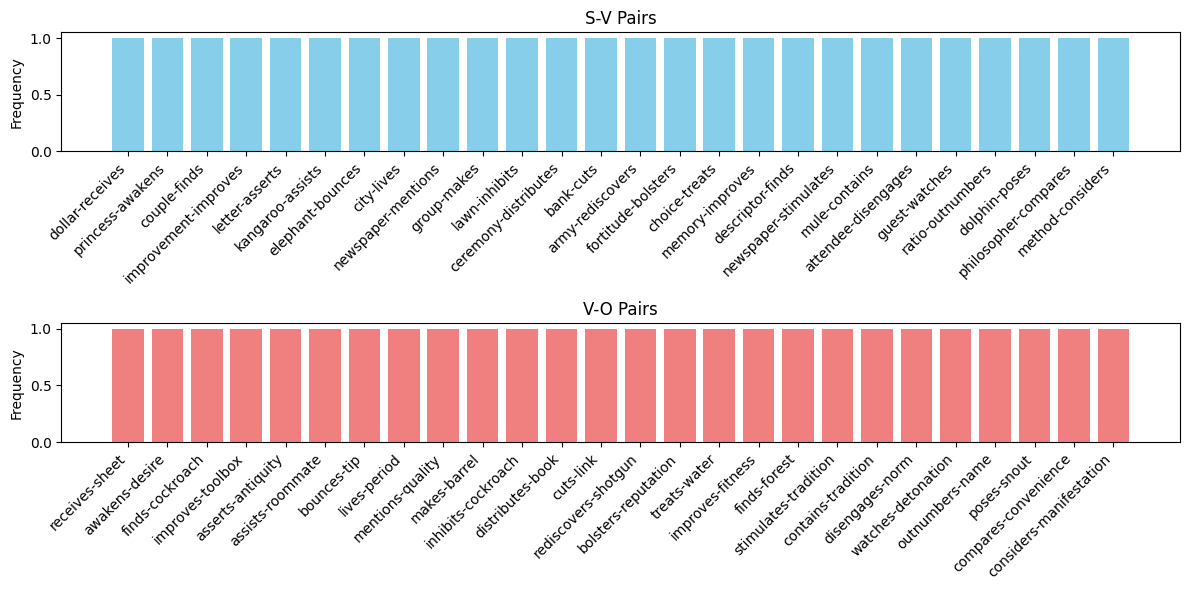

pap2:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


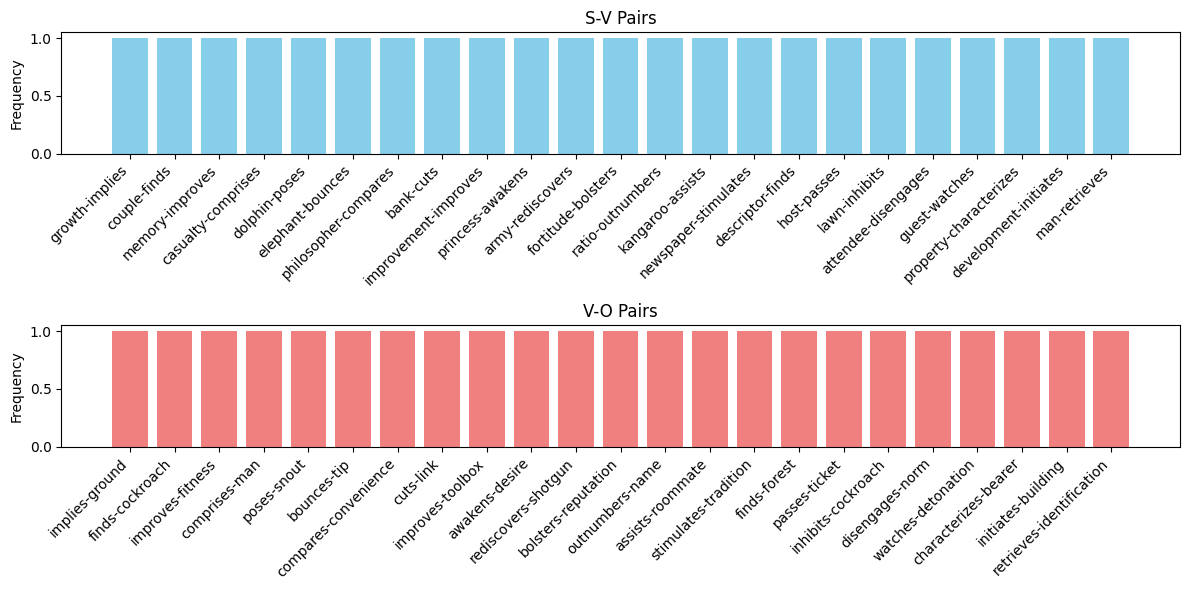

pap3:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


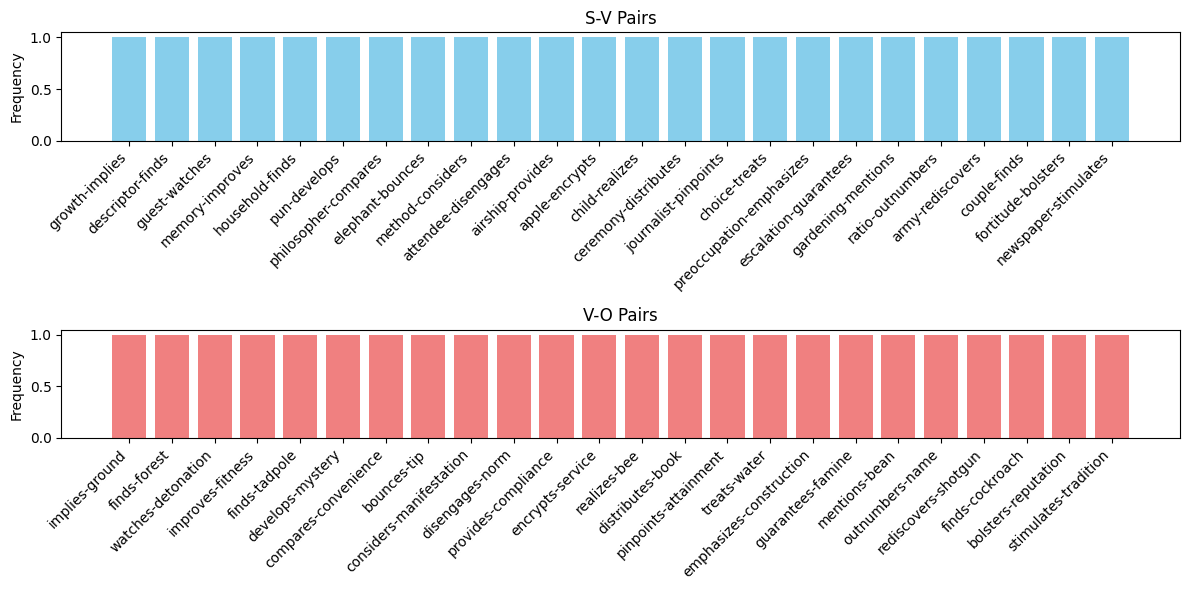

In [8]:
print('pap:number of token pairs')
data_set_pap.plot_tokens_bi_distribution(50)
print('pap2:number of token pairs')
data_set_pap2.plot_tokens_bi_distribution(50)
print('pap3:number of token pairs')
data_set_pap3.plot_tokens_bi_distribution(50)

# 3.POS analysis

## 3.1 unigram pos

In [9]:
print('pap:unique_pos')
print(len(data_set_pap.unique_pos)) #18
print('pap2:unique_pos')
print(len(data_set_pap2.unique_pos)) #17

print('pap3:unique_pos')
print(len(data_set_pap3.unique_pos)) #17


pap:unique_pos
6
pap2:unique_pos
6
pap3:unique_pos
7


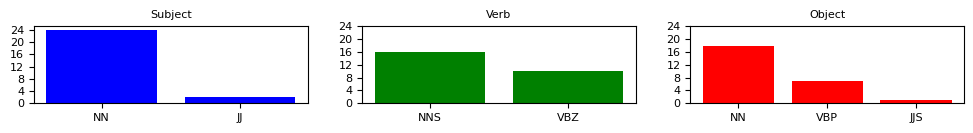

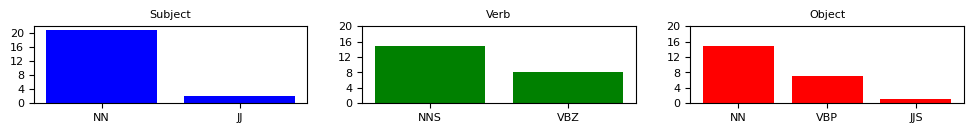

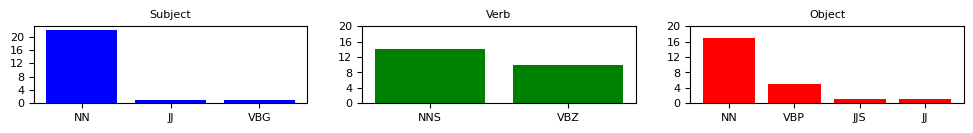

In [10]:
data_set_pap.plot_pos_uni_distribution()
data_set_pap2.plot_pos_uni_distribution()
data_set_pap3.plot_pos_uni_distribution()

## 3.2 bigram pos

In [11]:
pos1=data_set_pap.pos_bigrams_counts
pos2=data_set_pap2.pos_bigrams_counts
pos3=data_set_pap3.pos_bigrams_counts

In [12]:
print(pos1)
print(pos2)
print(pos3)

{'NN NNS': 14, 'NN VBZ': 10, 'NNS NN': 9, 'VBZ NN': 9, 'NNS VBP': 7, 'JJ NNS': 2, 'VBZ JJS': 1}
{'NN NNS': 13, 'NNS NN': 8, 'NN VBZ': 8, 'VBZ NN': 7, 'NNS VBP': 7, 'JJ NNS': 2, 'VBZ JJS': 1}
{'NN NNS': 12, 'NN VBZ': 10, 'NNS NN': 9, 'VBZ NN': 8, 'NNS VBP': 5, 'VBZ JJS': 1, 'VBZ JJ': 1, 'JJ NNS': 1, 'VBG NNS': 1}


## 4. abstractness analysis
of "pap_preds_filter.txt" and "pap_preds.txt"

Highly abstract a,  mid-range m, highly concrete c. 

In [13]:
current_dir =os.path.realpath(".")
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
filepath=os.path.abspath(os.path.join(parent_dir,'Data/pap/raw-annotations/dataset.tsv'))
filepath_test=os.path.abspath(os.path.join(parent_dir,'Data/pap/train-dev-test-split-filtered/binary/test.csv'))
filepath_train=os.path.abspath(os.path.join(parent_dir,'Data/pap/train-dev-test-split-filtered/binary/train.csv'))
print(filepath)

complete_data = []
with open(filepath, encoding="utf8") as f:
    for lines in f:
        line = lines.strip("\n").split('\t')[:3]
        line.append(lines.strip("\n").split('\t')[6])
        complete_data.append(line)
# print(complete_data[1:])

/home/linux1/BOX/modeling23/Data/pap/raw-annotations/dataset.tsv


In [14]:
def read_data_of_both(filepath):
    """
    :param filename: the file path
    :return: the complete data in a list with ['label of text', 'text']
    @author: Li Lin.
    """
    complete_data = []
    # open the file with utf8 encoding, split it at the comma (it should be csv)
    with open(filepath, encoding="utf8") as f:
        for lines in f:
            line = lines.strip("\n").split(',')

            if "pep-3k/" in filepath:
                complete_data.append(line)
            else:
                temp_line=[]
                if line[1] == "implausible":
                    temp_line.append('0')
                else:
                    temp_line.append('1')
                temp_line.append(line[0])
                complete_data.append(temp_line)
                
    return complete_data[1:]  # skip the header

paptest=read_data_of_both(filepath_test)
print(paptest)
paptrain=read_data_of_both(filepath_train)
print(paptrain)

[['1', 'album makes debut'], ['1', 'album breaks genre'], ['1', 'lack produces form'], ['1', 'inclusion expands range'], ['0', 'candidacy encodes appreciation'], ['1', 'literature comprises poetry'], ['0', 'interpretation buries railway'], ['0', 'invasion trims uniform'], ['1', 'population begins period'], ['0', 'saga injures courtesy'], ['1', 'ratio outnumbers name'], ['0', 'health gleans sweatshirt'], ['1', 'growth implies ground'], ['0', 'experimenter participates collision'], ['1', 'delegation violates doctrine'], ['1', 'attendee disengages norm'], ['0', 'rafter accentuates tranquility'], ['0', 'airship provides compliance'], ['0', 'ordination withholds taboo'], ['0', 'principle constrains wool'], ['1', 'memory improves fitness'], ['0', 'body gathers suspension'], ['1', 'designer wins challenge'], ['1', 'guest watches detonation'], ['1', 'recommendation stimulates discussion'], ['1', 'route utilizes part'], ['0', 'eminence corroborates area'], ['1', 'newspaper stimulates tradition'

In [15]:
print(data_set_pap.file_content)

[['0', 'dollar receives sheet'], ['1', 'princess awakens desire'], ['0', 'couple finds cockroach'], ['1', 'improvement improves toolbox'], ['1', 'letter asserts antiquity'], ['1', 'kangaroo assists roommate'], ['1', 'elephant bounces tip'], ['1', 'city lives period'], ['1', 'newspaper mentions quality'], ['1', 'group makes barrel'], ['1', 'lawn inhibits cockroach'], ['0', 'ceremony distributes book'], ['1', 'bank cuts link'], ['1', 'army rediscovers shotgun'], ['1', 'fortitude bolsters reputation'], ['1', 'choice treats water'], ['1', 'memory improves fitness'], ['1', 'descriptor finds forest'], ['1', 'newspaper stimulates tradition'], ['0', 'mule contains tradition'], ['1', 'attendee disengages norm'], ['1', 'guest watches detonation'], ['1', 'ratio outnumbers name'], ['1', 'dolphin poses snout'], ['1', 'philosopher compares convenience'], ['0', 'method considers manifestation']]


In [16]:
paptest_text_list=[paptest[i][1] for i in range(len(paptest))]
print(paptest_text_list)
paptest_content=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in paptest_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        paptest_content.append(temp)

paptest_ab=Abstractness_wrong(paptest_content)
# for i in paptest_ab.content:
#     print(i)

['album makes debut', 'album breaks genre', 'lack produces form', 'inclusion expands range', 'candidacy encodes appreciation', 'literature comprises poetry', 'interpretation buries railway', 'invasion trims uniform', 'population begins period', 'saga injures courtesy', 'ratio outnumbers name', 'health gleans sweatshirt', 'growth implies ground', 'experimenter participates collision', 'delegation violates doctrine', 'attendee disengages norm', 'rafter accentuates tranquility', 'airship provides compliance', 'ordination withholds taboo', 'principle constrains wool', 'memory improves fitness', 'body gathers suspension', 'designer wins challenge', 'guest watches detonation', 'recommendation stimulates discussion', 'route utilizes part', 'eminence corroborates area', 'newspaper stimulates tradition', 'collision abandons value', 'pipe incorporates layer', 'letter asserts antiquity', 'philosopher compares convenience', 'pun develops mystery', 'pitch litigates bicycle', 'image depicts glacier'

In [17]:
paptrain_text_list=[paptrain[i][1] for i in range(len(paptrain))]
print(paptrain_text_list)
paptrain_content=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in paptrain_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        paptrain_content.append(temp)

paptrain_ab=Abstractness_wrong(paptrain_content)
# for i in paptrain_ab.content:
#     print(i)

['group releases album', 'rich unfold interest', 'fruit reduces risk', 'market drives innovation', 'firefighter works schedule', 'group fits definition', 'album draws title', 'dialect secretes jealousy', 'compiler gathers winter', 'researcher describes form', 'encouragement slips repertoire', 'housing heightens army', 'nation establishes monument', 'arrangement fits definition', 'company makes bar', 'collector pummels stage', 'economy bounces judge', 'band reschedules tour', 'pitch reaches accountability', 'marketing starts revenue', 'engine harasses oil', 'lookout dominates pond', 'person sends letter', 'attendee uncovers interview', 'outsider introduces desire', 'character narrates episode', 'conspiracy threatens city', 'company announces plan', 'roof redirects invitation', 'mysticism disbands flag', 'fascination draws attention', 'astrophysicist passes excavation', 'foot turns attempt', 'photograph portrays procession', 'anger locks attack', 'celebration suspends ball', 'method glea

In [18]:
pap_text_list=[data_set_pap.file_content[i][1] for i in range(len(data_set_pap.file_content))]
print(pap_text_list)

pap_content=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pap_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        pap_content.append(temp)

pap_ab=Abstractness_wrong(pap_content)
# for i in pap_ab.content:
#     print(i)

['dollar receives sheet', 'princess awakens desire', 'couple finds cockroach', 'improvement improves toolbox', 'letter asserts antiquity', 'kangaroo assists roommate', 'elephant bounces tip', 'city lives period', 'newspaper mentions quality', 'group makes barrel', 'lawn inhibits cockroach', 'ceremony distributes book', 'bank cuts link', 'army rediscovers shotgun', 'fortitude bolsters reputation', 'choice treats water', 'memory improves fitness', 'descriptor finds forest', 'newspaper stimulates tradition', 'mule contains tradition', 'attendee disengages norm', 'guest watches detonation', 'ratio outnumbers name', 'dolphin poses snout', 'philosopher compares convenience', 'method considers manifestation']
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag


In [19]:
pep_text_list=[data_set_pap2.file_content[i][1] for i in range(len(data_set_pap2.file_content))]
print(pep_text_list)

pap_content2=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pep_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        pap_content2.append(temp)

pap_ab2=Abstractness_wrong(pap_content2)
# for i in pap_ab2.content:
#     print(i)

['growth implies ground', 'couple finds cockroach', 'memory improves fitness', 'casualty comprises man', 'dolphin poses snout', 'elephant bounces tip', 'philosopher compares convenience', 'bank cuts link', 'improvement improves toolbox', 'princess awakens desire', 'army rediscovers shotgun', 'fortitude bolsters reputation', 'ratio outnumbers name', 'kangaroo assists roommate', 'newspaper stimulates tradition', 'descriptor finds forest', 'host passes ticket', 'lawn inhibits cockroach', 'attendee disengages norm', 'guest watches detonation', 'property characterizes bearer', 'development initiates building', 'man retrieves identification']
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag


In [20]:
pap3_text_list=[data_set_pap3.file_content[i][1] for i in range(len(data_set_pap3.file_content))]
print(pap3_text_list)

pap_content3=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pap3_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        pap_content3.append(temp)

pap_ab3=Abstractness_wrong(pap_content3)
# for i in pap_ab3.content:
#     print(i)

['growth implies ground', 'descriptor finds forest', 'guest watches detonation', 'memory improves fitness', 'household finds tadpole', 'pun develops mystery', 'philosopher compares convenience', 'elephant bounces tip', 'method considers manifestation', 'attendee disengages norm', 'airship provides compliance', 'apple encrypts service', 'child realizes bee', 'ceremony distributes book', 'journalist pinpoints attainment', 'choice treats water', 'preoccupation emphasizes construction', 'escalation guarantees famine', 'gardening mentions bean', 'ratio outnumbers name', 'army rediscovers shotgun', 'couple finds cockroach', 'fortitude bolsters reputation', 'newspaper stimulates tradition']
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag


In [21]:
print(pap_ab.count_ab_bigrams())
print(pap_ab2.count_ab_bigrams())
print(pap_ab3.count_ab_bigrams())

get all data abstractness tag
{'first_bigrams': {'a-a': 3, 'a-m': 2, 'a-c': 1, 'm-a': 0, 'm-m': 5, 'm-c': 1, 'c-a': 3, 'c-m': 4, 'c-c': 3}, 'second_bigrams': {'a-a': 2, 'a-m': 1, 'a-c': 3, 'm-a': 4, 'm-m': 1, 'm-c': 6, 'c-a': 1, 'c-m': 2, 'c-c': 2}, 'third_bigrams': {'a-a': 1, 'a-m': 2, 'a-c': 3, 'm-a': 2, 'm-m': 1, 'm-c': 3, 'c-a': 4, 'c-m': 1, 'c-c': 5}, 'total_bigrams': {'a-a': 6, 'a-m': 5, 'a-c': 7, 'm-a': 6, 'm-m': 7, 'm-c': 10, 'c-a': 8, 'c-m': 7, 'c-c': 10}}
get all data abstractness tag
{'first_bigrams': {'a-a': 5, 'a-m': 3, 'a-c': 0, 'm-a': 1, 'm-m': 4, 'm-c': 1, 'c-a': 2, 'c-m': 1, 'c-c': 3}, 'second_bigrams': {'a-a': 1, 'a-m': 2, 'a-c': 5, 'm-a': 2, 'm-m': 1, 'm-c': 5, 'c-a': 1, 'c-m': 2, 'c-c': 1}, 'third_bigrams': {'a-a': 1, 'a-m': 2, 'a-c': 5, 'm-a': 2, 'm-m': 2, 'm-c': 2, 'c-a': 1, 'c-m': 1, 'c-c': 4}, 'total_bigrams': {'a-a': 7, 'a-m': 7, 'a-c': 10, 'm-a': 5, 'm-m': 7, 'm-c': 8, 'c-a': 4, 'c-m': 4, 'c-c': 8}}
get all data abstractness tag
{'first_bigrams': {'a-a': 3, 'a

In [22]:
def calculate_amc(d):
    a=0
    m=0
    c=0
    for i in d:
        for j in d[i]:
            if i=='a':
                a+=d[i][j]
            elif i=='m':
                m+=d[i][j]
            elif i=='c':
                c+=d[i][j]
    print(a,m,c)
    return [a,m,c]


d=paptrain_ab.get_ab_tokens_mapping()
calculate_amc(d)
d=paptest_ab.get_ab_tokens_mapping()
calculate_amc(d)
d=pap_ab.get_ab_tokens_mapping()
calculate_amc(d)
d=pap_ab2.get_ab_tokens_mapping()
calculate_amc(d)
d=pap_ab3.get_ab_tokens_mapping()
calculate_amc(d)

get all data abstractness tag
1099 1097 1122
get all data abstractness tag
156 126 126
get all data abstractness tag
19 21 26
get all data abstractness tag
20 19 21
get all data abstractness tag
17 20 14


[17, 20, 14]

get all data abstractness tag
1099 1097 1122
get all data abstractness tag
156 126 126
get all data abstractness tag
20 19 21
get all data abstractness tag
17 20 14


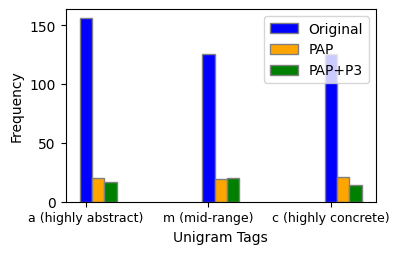

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
original_train =calculate_amc(paptrain_ab.get_ab_tokens_mapping())
original_test = calculate_amc(paptest_ab.get_ab_tokens_mapping())
pap = calculate_amc(pap_ab2.get_ab_tokens_mapping())
pep_3k = calculate_amc(pap_ab3.get_ab_tokens_mapping())



# Labels
labels = ['a (highly abstract)', 'm (mid-range)', 'c (highly concrete)']

# Set the width of the bars
bar_width = 0.1

# Set the position of the bars on the x-axis
r1 = np.arange(len(original_train))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
plt.figure(figsize=(4, 2.5))
# Plotting the bars
# plt.bar(r1, original_train, color='b', width=bar_width, edgecolor='grey', label='Original Train')
plt.bar(r2, original_test, color='b',  width=bar_width, edgecolor='grey', label='Original')
plt.bar(r3, pap, width=bar_width, color='orange', edgecolor='grey', label='PAP')
plt.bar(r4, pep_3k, width=bar_width,color='g', edgecolor='grey', label='PAP+P3')

# Adding labels
# plt.title('Comparison of Unigram Frequencies', fontsize=9,fontweight='bold')
plt.xlabel('Unigram Tags')
plt.ylabel('Frequency')
plt.xticks([r + bar_width for r in range(len(original_test))], labels, fontsize=9)

# Adding a legend
plt.legend()

# Showing the plot
plt.show()


## 4.1 unigram abstractness tag

get all data abstractness tag


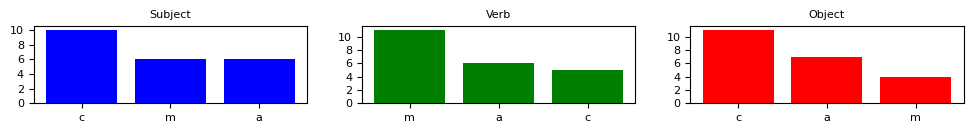

get all data abstractness tag


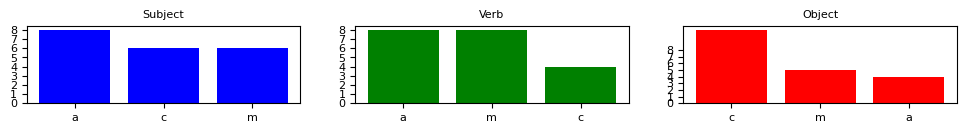

get all data abstractness tag


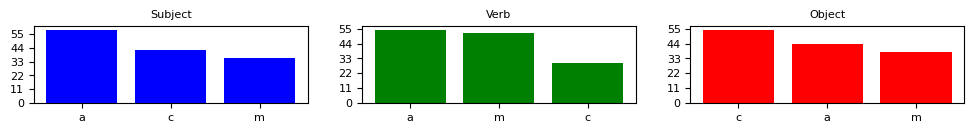

get all data abstractness tag


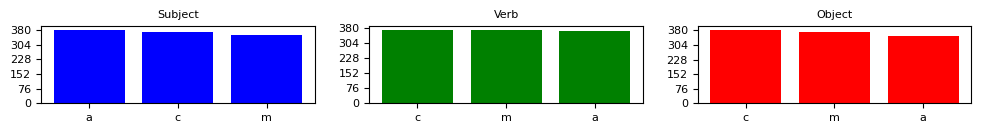

get all data abstractness tag


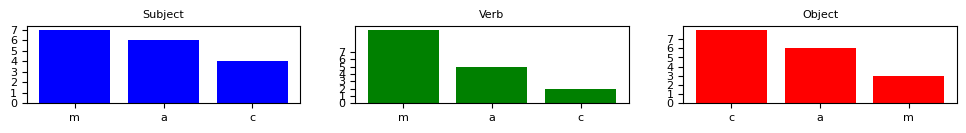

In [24]:
pap_ab.plot_ab_uni_distribution()
pap_ab2.plot_ab_uni_distribution()
paptest_ab.plot_ab_uni_distribution()
paptrain_ab.plot_ab_uni_distribution()
pap_ab3.plot_ab_uni_distribution()
# pap_ab.plot_ab_uni_distribution(0)
# pap_ab.plot_ab_uni_distribution(1)

## 4.2 bigram abstractness tag

get all data abstractness tag


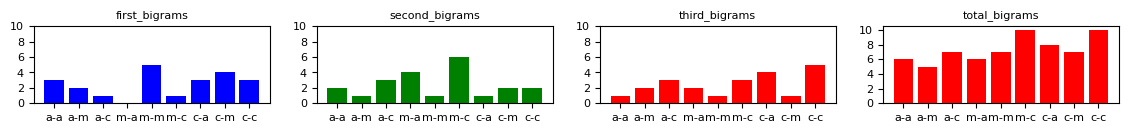

get all data abstractness tag


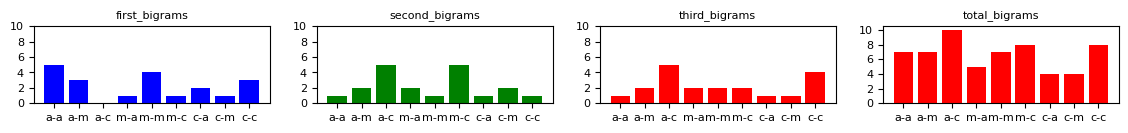

get all data abstractness tag


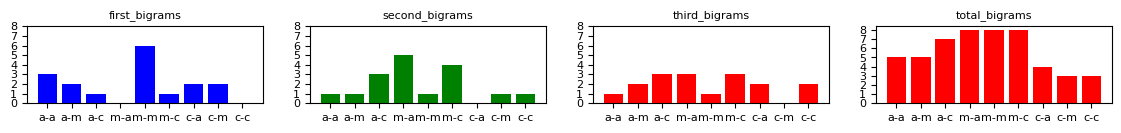

get all data abstractness tag


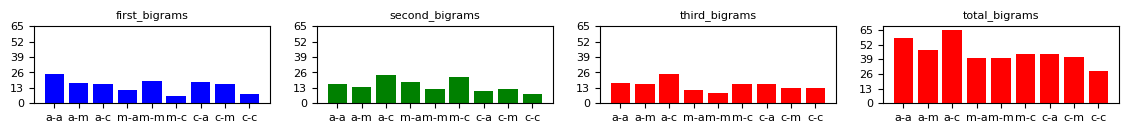

get all data abstractness tag


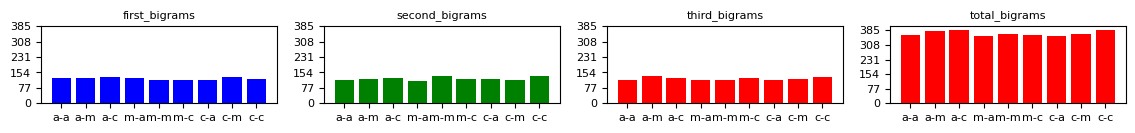

In [25]:
_=pap_ab.plot_ab_bi_distribution()
counts2=pap_ab2.plot_ab_bi_distribution()
counts3=pap_ab3.plot_ab_bi_distribution()
countstest=paptest_ab.plot_ab_bi_distribution()
_=paptrain_ab.plot_ab_bi_distribution()

In [26]:
print(countstest['first_bigrams'])

{'a-a': 25, 'a-m': 17, 'a-c': 16, 'm-a': 11, 'm-m': 19, 'm-c': 6, 'c-a': 18, 'c-m': 16, 'c-c': 8}


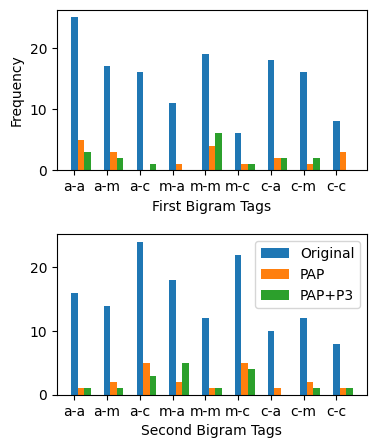

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Function to draw bar plot for each type of bigrams
def draw_combined_bar_plot(bigrams, data, title):
    x = np.arange(len(bigrams))
    width = 0.2

    for i, (dataset, values) in enumerate(data.items()):
        plt.bar(x + i*width, [values[bigram] for bigram in bigrams], width, label=dataset)

# Draw the combined bar plot
        
plt.figure(figsize=(4, 5))
plt.subplots_adjust(hspace=0.4, wspace=1)
plt.subplot(2, 1, 1)
original_test = countstest['first_bigrams']
pap = counts2['first_bigrams']
pap_p3 = counts3['first_bigrams']
plt.ylabel('Frequency')
combined_data = { 'Original': original_test, 'PAP': pap, 'PAP+P3': pap_p3}
bigrams = list(original_test.keys())
draw_combined_bar_plot(bigrams, combined_data, 'Comparison of Bigram Frequencies')
plt.xlabel('First Bigram Tags')
plt.xticks(np.arange(len(bigrams)), bigrams)
# plt.title('Comparison of first_bigram Frequencies',  fontsize=9,fontweight='bold')


plt.subplot(2, 1, 2)
original_test = countstest['second_bigrams']
pap = counts2['second_bigrams']
pap_p3 = counts3['second_bigrams']
combined_data = { 'Original': original_test, 'PAP': pap, 'PAP+P3': pap_p3}
bigrams = list(original_test.keys())
draw_combined_bar_plot(bigrams, combined_data, 'Comparison of Bigram Frequencies')
plt.xlabel('Second Bigram Tags')
plt.xticks(np.arange(len(bigrams)), bigrams)
plt.legend()
plt.show()


In [28]:
# print(paptrain_ab.content)
# print(paptest_ab.content)
# print(pap_ab2.content)
# print(pap_ab3.content)

traind={'a-a-a':0, 'a-a-m':0,'a-a-c':0,'a-m-a':0,'a-m-m':0,'a-m-c':0,'a-c-a':0,'a-c-m':0,'a-c-c':0,'m-a-a':0,'m-a-m':0,'m-a-c':0,'m-m-a':0,'m-m-m':0,'m-m-c':0,'m-c-a':0,'m-c-m':0,'m-c-c':0,'c-a-a':0,'c-a-m':0,'c-a-c':0,'c-m-a':0,'c-m-m':0,'c-m-c':0,'c-c-a':0,'c-c-m':0,'c-c-c':0}
testd={'a-a-a':0, 'a-a-m':0,'a-a-c':0,'a-m-a':0,'a-m-m':0,'a-m-c':0,'a-c-a':0,'a-c-m':0,'a-c-c':0,'m-a-a':0,'m-a-m':0,'m-a-c':0,'m-m-a':0,'m-m-m':0,'m-m-c':0,'m-c-a':0,'m-c-m':0,'m-c-c':0,'c-a-a':0,'c-a-m':0,'c-a-c':0,'c-m-a':0,'c-m-m':0,'c-m-c':0,'c-c-a':0,'c-c-m':0,'c-c-c':0}
pap2d={'a-a-a':0, 'a-a-m':0,'a-a-c':0,'a-m-a':0,'a-m-m':0,'a-m-c':0,'a-c-a':0,'a-c-m':0,'a-c-c':0,'m-a-a':0,'m-a-m':0,'m-a-c':0,'m-m-a':0,'m-m-m':0,'m-m-c':0,'m-c-a':0,'m-c-m':0,'m-c-c':0,'c-a-a':0,'c-a-m':0,'c-a-c':0,'c-m-a':0,'c-m-m':0,'c-m-c':0,'c-c-a':0,'c-c-m':0,'c-c-c':0}
pap3d={'a-a-a':0, 'a-a-m':0,'a-a-c':0,'a-m-a':0,'a-m-m':0,'a-m-c':0,'a-c-a':0,'a-c-m':0,'a-c-c':0,'m-a-a':0,'m-a-m':0,'m-a-c':0,'m-m-a':0,'m-m-m':0,'m-m-c':0,'m-c-a':0,'m-c-m':0,'m-c-c':0,'c-a-a':0,'c-a-m':0,'c-a-c':0,'c-m-a':0,'c-m-m':0,'c-m-c':0,'c-c-a':0,'c-c-m':0,'c-c-c':0}

for i in range(len(paptrain_ab.content)):
    traind[paptrain_ab.content[i][2]]+=1
for i in range(len(paptest_ab.content)):
    testd[paptest_ab.content[i][2]]+=1
for i in range(len(pap_ab2.content)):
    pap2d[pap_ab2.content[i][2]]+=1
for i in range(len(pap_ab3.content)):
    pap3d[pap_ab3.content[i][2]]+=1
    

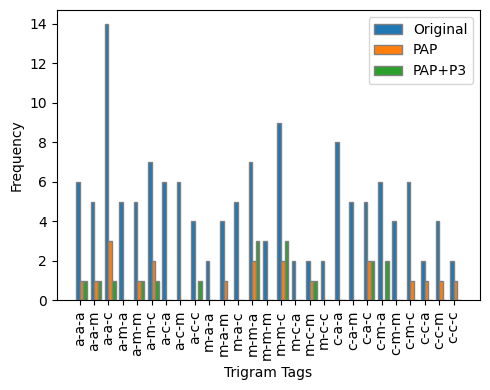

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data
original_train = traind
original_test = testd
pap = pap2d
pep_3k = pap3d

# Extracting features
features = list(original_train.keys())

# Data for plotting
original_train_values = [original_train[feature] for feature in features]
original_test_values = [original_test[feature] for feature in features]
pap_values = [pap[feature] for feature in features]
pep_3k_values = [pep_3k[feature] for feature in features]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


plt.figure(figsize=(5, 4))
# Plotting the bars
# plt.bar(r1, original_train_values, color='b', width=bar_width, edgecolor='grey', label='Original Train')
plt.bar(r2, original_test_values, width=bar_width, edgecolor='grey', label='Original')
plt.bar(r3, pap_values,  width=bar_width, edgecolor='grey', label='PAP')
plt.bar(r4, pep_3k_values,  width=bar_width, edgecolor='grey', label='PAP+P3')

# Adding labels
# plt.title('Comparison of Trigram Frequencies ',fontsize=10 ,fontweight='bold')
plt.xlabel('Trigram Tags')
plt.ylabel('Frequency')
plt.xticks([r + bar_width*1.5 for r in range(len(features))], features, rotation=90)

# Adding a legend
plt.legend()

# Showing the plot
plt.tight_layout()
plt.show()


## 4.3 tokens and abstractness

get all data abstractness tag


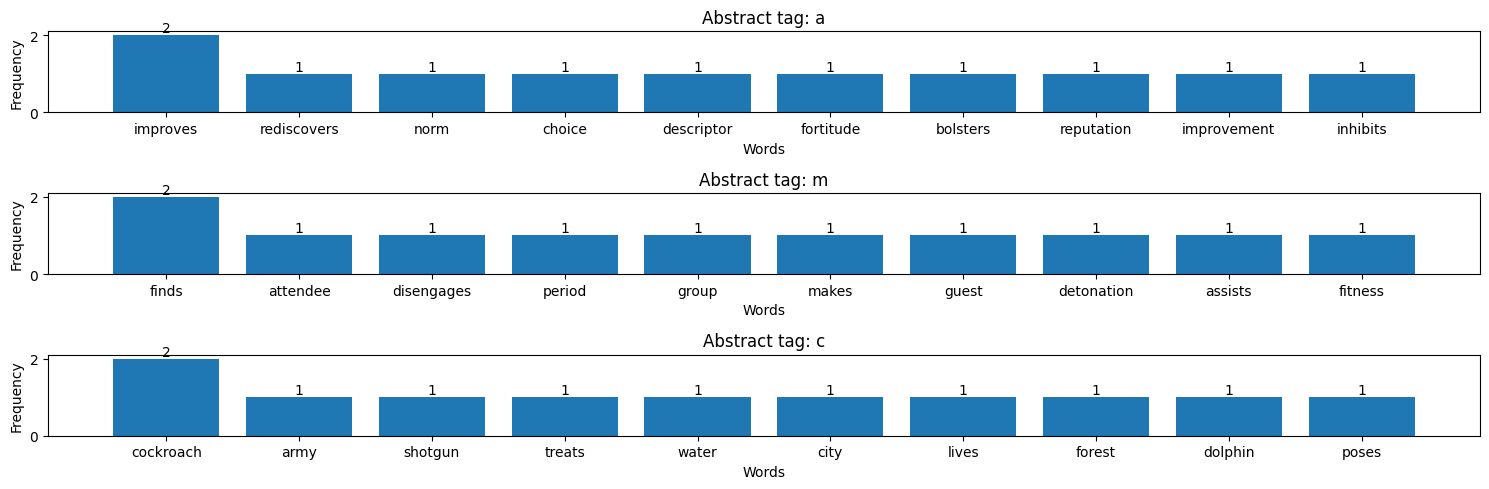

get all data abstractness tag


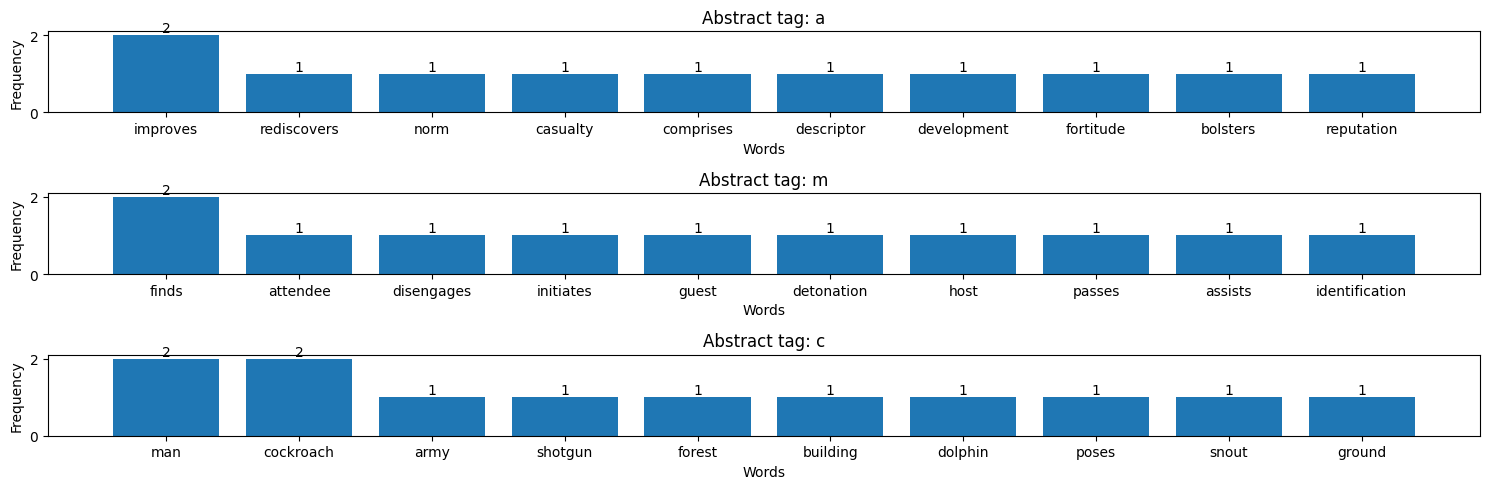

get all data abstractness tag


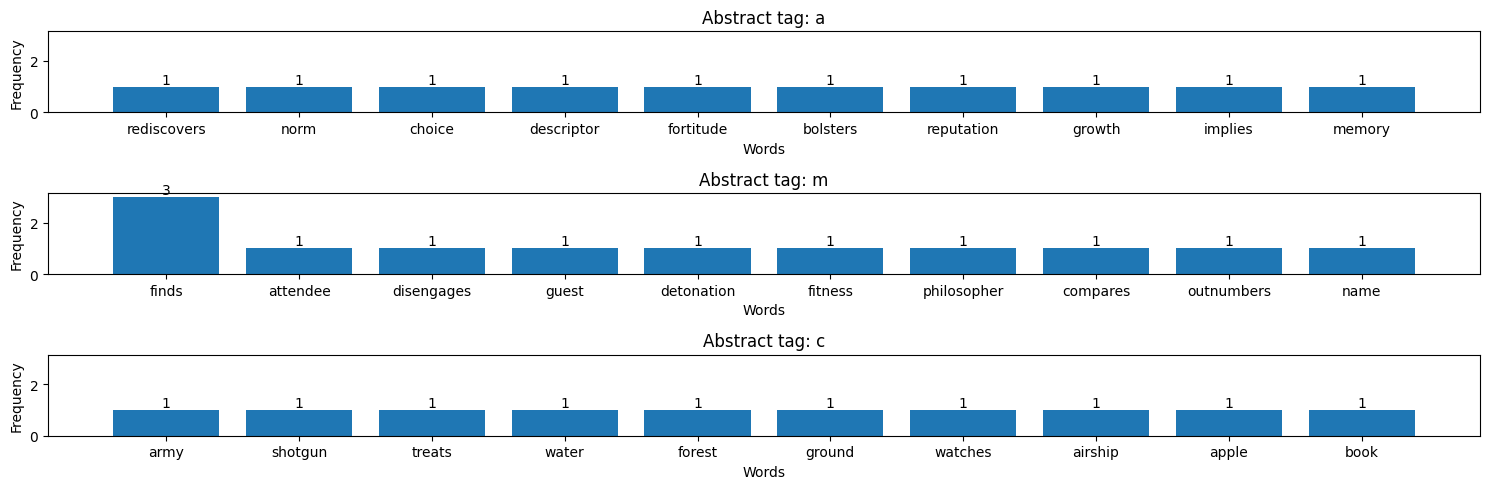

In [30]:
pap_ab.plot_ab_tokens_distribution()
pap_ab2.plot_ab_tokens_distribution()
pap_ab3.plot_ab_tokens_distribution()

In [31]:
pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    if 'find' in i[0]:
        print(i)
    if 'army' in i[0]:
        print(i)

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
['army rediscovers shotgun', 'plausible', 'c-a-c', '1']
['descriptor finds forest', 'plausible', 'a-m-c', '1']
['couple finds cockroach', 'implausible', 'm-m-c', '1']


In [32]:
pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    if i[1]=='plausible' and i[3]!='1':
        print('1.', i)
    elif i[1]=='implausible' and i[3]!='0':
        print('2.', i)

print()
pap_ab2=Abstractness_wrong(pap_content2)
for i in pap_ab2.content:
    if i[1]=='plausible' and i[3]!='1':
        print('1.', i)
    elif i[1]=='implausible' and i[3]!='0':
        print('2.', i)

print()
pap_ab3=Abstractness_wrong(pap_content3)
for i in pap_ab2.content:
    if i[1]=='plausible' and i[3]!='1':
        print('1.', i)
    elif i[1]=='implausible' and i[3]!='0':
        print('2.', i)

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
1. ['choice treats water', 'plausible', 'a-c-c', 'unsure']
1. ['dolphin poses snout', 'plausible', 'c-c-c', 'unsure']
1. ['group makes barrel', 'plausible', 'm-m-c', 'unsure']
1. ['kangaroo assists roommate', 'plausible', 'c-m-c', 'unsure']
1. ['memory improves fitness', 'plausible', 'a-a-m', 'unsure']
1. ['ratio outnumbers name', 'plausible', 'a-m-m', 'unsure']
2. ['ceremony distributes book', 'implausible', 'm-m-c', '1']
2. ['couple finds cockroach', 'implausible', 'm-m-c', '1']
2. ['dollar receives sheet', 'implausible', 'c-m-c', '1']
2. ['mule contains tradition', 'implausible', 'c-m-a', 'unsure']

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
1. ['development initiates building', 'plausible', 'a-m-c', 'unsure']
1. ['dolphin poses snout', 'plausible', 'c-c-c', 'unsure']
1. ['growth implies g